In [1]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [3]:
# Create DataFrame here.
newark_tree_data = pd.read_csv("data/newark_tree_data.csv")

In [5]:
# Display the first few rows of the DataFrame here.
newark_tree_data.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [8]:
# How many columns does the DataFrame contain?
newark_tree_data.shape

(4193, 54)

In [9]:
len(newark_tree_data.columns)

54

In [10]:
# What attributes (columns) does this DataFrame contain?
newark_tree_data.columns

Index(['ID', 'ON', 'AREA', 'ADDRESS', 'STREET', 'SITE', 'SIDE', 'ASSIGNED',
       'COMMON', 'BOTANICAL', 'CULTIVAR', 'DBH', 'REMOVAL', 'STEMS', 'COND',
       'MAINTPRIM', 'OBSERVE', 'INSPECT', 'LOCATION', 'NOTES', 'DATE', 'TIME',
       'STAFF', 'XCOORD', 'YCOORD', 'FAILURE', 'LIKELIHOOD', 'TARGET',
       'CONSEQ', 'RISK', 'UNIQUEID', 'EDITTIME', 'SPREAD', 'HEIGHT',
       'CLEARANCE', 'DECAYCL', 'DECAYT', 'DECAYRF', 'DAMC', 'DAMT', 'DAMRF',
       'CAVITYCL', 'CAVITYT', 'CAVITYRF', 'IMPROPMULC', 'IMPROPPRUN',
       'NUTRIENTD', 'PEST', 'GIRDLING', 'STRESS', 'OHUTILITY', 'TOP_HEIGHT',
       'CROWN_M', 'CROWN_DIE'],
      dtype='object')

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [12]:
# Create the new DataFrame here.
new_dataframe = newark_tree_data.set_index('ID')

In [16]:
new_df = pd.read_csv("data/newark_tree_data.csv", index_col=['ID'], usecols=['ID', 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT'])

In [17]:
# Display the first few rows of the new DataFrame here.
new_df.head()

,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,,
11.0,"arborvitae, eastern",Thuja occidentalis,Good,Low,LM 20150929141218,40
12.0,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,LM 20150929141418,40
13.0,"pine, eastern white",Pinus strobus,Good,Low,LM 20150929141844,54
14.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929142424,56
15.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929143018,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [18]:
# How many rows does your DataFrame contain.
new_df.shape

(4193, 6)

Let's look at the distribution of data for the HEIGHT attribute.

In [26]:
# What is the min height?
min(new_df['HEIGHT'])

0

In [27]:
# What is the max height?
max(new_df['HEIGHT'])

140

In [28]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
new_df['HEIGHT'].describe()

count    4193.000000
mean       55.311472
std        36.293489
min         0.000000
25%        23.000000
50%        50.000000
75%        86.000000
max       140.000000
Name: HEIGHT, dtype: float64

# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [32]:
# Apply magic command to display matplotlib images inline
%gui
%matplotlib inline
from IPython.display import set_matplotlib_formats

<AxesSubplot:ylabel='Frequency'>

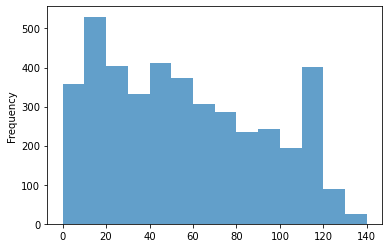

In [42]:
# Create a histogram using the HEIGHT attribute here
new_df['HEIGHT'].plot.hist(bins=14, alpha=.7)

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [52]:
# How many entries are stumps
new_df[new_df['HEIGHT']==0]

,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,,
119.0,stump,stump,NaN,NaN,LM 20151001093501,0
120.0,stump,stump,NaN,NaN,LM 20151001093612,0
269.0,stump,stump,NaN,NaN,LM 20151005101319,0
270.0,stump,stump,NaN,NaN,LM 20151005101403,0
271.0,stump,stump,NaN,NaN,LM 20151005101436,0
...,...,...,...,...,...,...
4095.0,stump,stump,NaN,NaN,SR 20151103154447,0
4149.0,stump,stump,NaN,NaN,SR 20151104115722,0
4167.0,stump,stump,NaN,NaN,SR 20151104142636,0


In [72]:
new_df[new_df['COMMON']=='stump']

,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,,
119.0,stump,stump,NaN,NaN,LM 20151001093501,0
120.0,stump,stump,NaN,NaN,LM 20151001093612,0
269.0,stump,stump,NaN,NaN,LM 20151005101319,0
270.0,stump,stump,NaN,NaN,LM 20151005101403,0
271.0,stump,stump,NaN,NaN,LM 20151005101436,0
...,...,...,...,...,...,...
4095.0,stump,stump,NaN,NaN,SR 20151103154447,0
4149.0,stump,stump,NaN,NaN,SR 20151104115722,0
4167.0,stump,stump,NaN,NaN,SR 20151104142636,0


In [71]:
# How many entries are vacant sites
new_df[new_df['COMMON']=='vacant site, large']

,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
ID,,,,,,
3913.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031122829,0
3922.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031125116,0
3939.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031132401,0
3941.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031133111,0
3946.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031133520,0
3947.0,"vacant site, large",vacant site large,NaN,NaN,SR 20151031133542,0


In [ ]:
# Do these number add up?
Sure do.

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [ ]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?


In [ ]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.


In [ ]:
# Plot the Series here


In [ ]:
# How many entries have missing values for the COND attribute? Why are these values missing?


# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [ ]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?


In [ ]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High


In [ ]:
# Plot the pie chart here


In [ ]:
# How many entries have missing values for the RISK attribute? Why are these values missing?


# Indexing

In [ ]:
# Display row by position 1


In [ ]:
# Display row by label 1
